In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [585]:
# Establecer el color predeterminado que deseas para tus gráficos (por ejemplo, "red")
sns.set_palette("deep")

In [586]:
file_path = "../datos procesados/homicidios_clean.csv"

df = pd.read_csv(file_path)

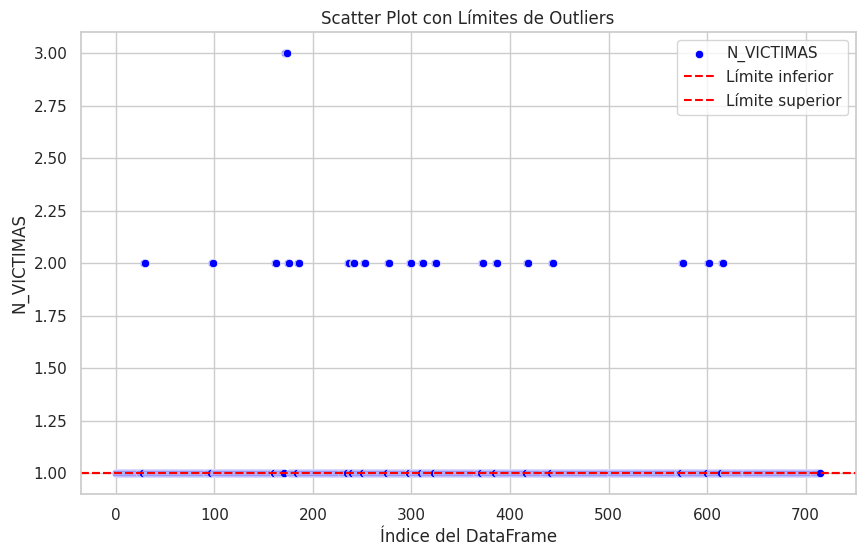

<Figure size 640x480 with 0 Axes>

In [587]:
# Supongamos que 'N_VICTIMAS' es la columna de interés en tu DataFrame 'df'
columna_interes = 'N_VICTIMAS'

# Crear un scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.index, y=df[columna_interes], color='blue', label='N_VICTIMAS')

# Agregar una línea para los límites de outliers
Q1 = df[columna_interes].quantile(0.25)
Q3 = df[columna_interes].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

plt.axhline(y=limite_inferior, color='red', linestyle='--', label='Límite inferior')
plt.axhline(y=limite_superior, color='red', linestyle='--', label='Límite superior')

# Personalizar el gráfico
plt.title('Scatter Plot con Límites de Outliers')
plt.xlabel('Índice del DataFrame')
plt.ylabel(columna_interes)
plt.legend()

# Mostrar el gráfico
plt.show()

plt.savefig('../gráficos/N_VICTIMAS_SCATTER PLOT.png')

La mediana del número de víctimas es de 2. Esto significa que la mitad de los accidentes tuvieron 2 o más víctimas, y la otra mitad tuvo 1 o 0 víctimas.. En menor medida hay casos en los que hay 3 victimas. Se podría decir que la cantidad de victimas es realtivamente baja en los siniestros viales registrados.

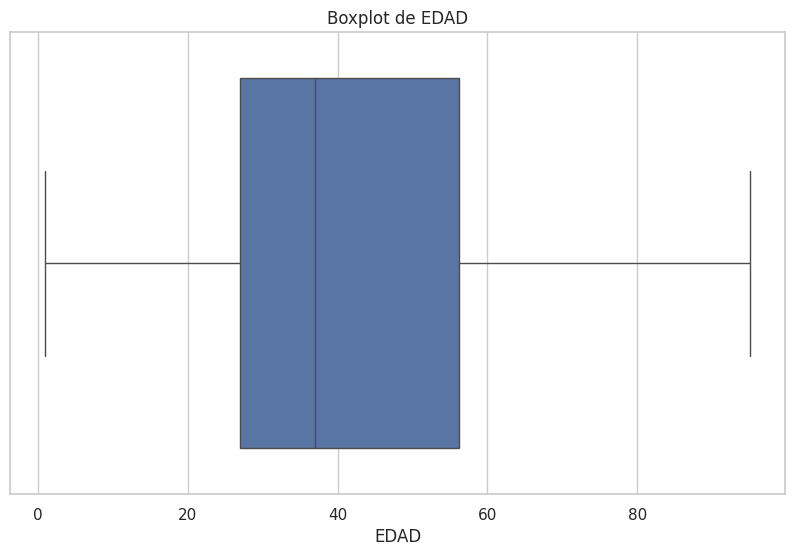

<Figure size 640x480 with 0 Axes>

In [611]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño según tus necesidades
sns.boxplot(x=df['EDAD'])
plt.title(f'Boxplot de EDAD')
plt.show()

plt.savefig('../gráficos/EDAD BOX PLOT.png')

El boxplot muestra que la mediana de edad de los conductores involucrados en los siniestros viales en CABA es de 40 años. Esto significa que la mitad de los conductores tenían 40 años o menos, y la otra mitad tenía 40 años o más. En general, el gráfico muestra que la mayoría de los conductores involucrados en los siniestros viales en CABA tienen entre 30 y 50 años. Sin embargo, también hay algunos conductores con una edad inusualmente alta o baja, pero que son edades posibles en fin.

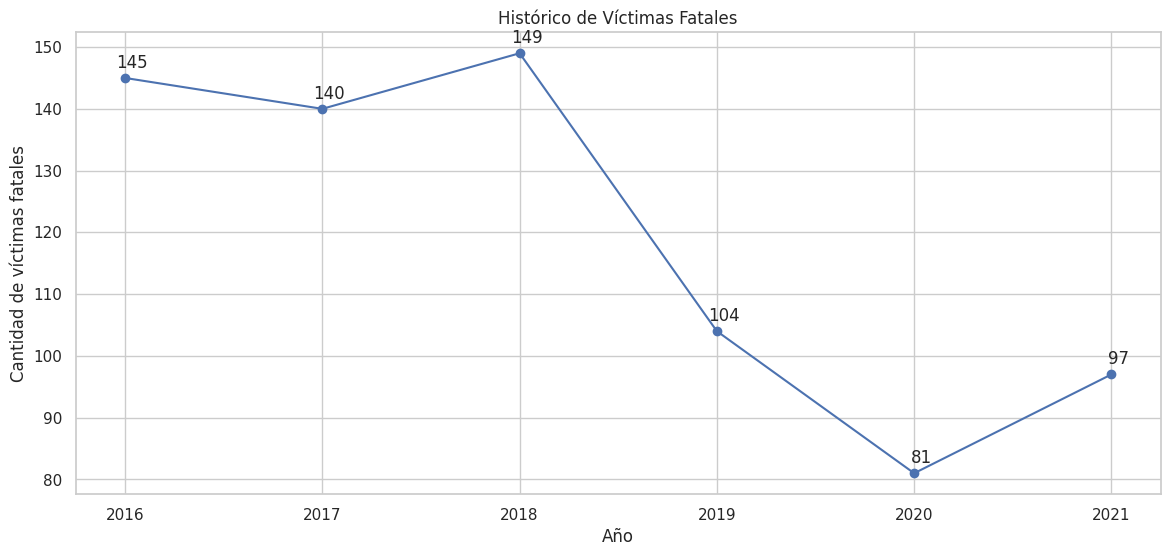

<Figure size 640x480 with 0 Axes>

In [589]:
# Convierte la columna 'FECHA_HORA' a formato de fecha y hora
df['FECHA_HORA'] = pd.to_datetime(df['FECHA_HORA'])

# Extrae los años y cuenta su frecuencia
años = df['FECHA_HORA'].dt.year.value_counts()

# Crea un DataFrame con los datos
df_años = pd.DataFrame({'Año': años.index, 'Cantidad': años.values})

# Ordena los datos por año
df_años = df_años.sort_values(by='Año')

# Convierte las columnas a arreglos de NumPy
años_array = df_años['Año'].values
cantidad_array = df_años['Cantidad'].values

# Grafica usando Matplotlib
plt.figure(figsize=(14, 6))
plt.plot(años_array, cantidad_array, marker="o", linestyle="-")

# Añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas fatales')
plt.title('Histórico de Víctimas Fatales')

# Añade los valores numéricos en cada punto
# Ajusta los valores numéricos en cada punto
for x, y in zip(años_array, cantidad_array):
    plt.text(x +0.035, y + 1, str(y), ha='center', va='bottom')

# Muestra el gráfico
plt.show()

plt.savefig('../gráficos/HISTORICO VICTIMAS AÑO LINE CHART.png')

En 2021, hubo un aumento de los siniestros viales con víctimas fatales respecto al año 2020. En 2021 ocurrieron 97 siniestros viales con víctimas fatales este número es superior al registrado en 2020, cuando hubo 81 siniestros, pero menor al registrado en 2019, cuando hubo 104.

Este aumento de los siniestros viales puede interpretarse por un lado, como un efecto del paulatino aumento de la circulación post pandemia. En 2020, la circulación vehicular se redujo drásticamente debido a las restricciones sanitarias impuestas por la pandemia de COVID-19. Sin embargo, en 2021, la circulación vehicular comenzó a recuperarse, lo que podría haber contribuido al aumento de los siniestros viales.

Sin embargo, el número de siniestros fatales en 2021 aún se encuentra por debajo del nivel de 2019, año pre pandémico. 

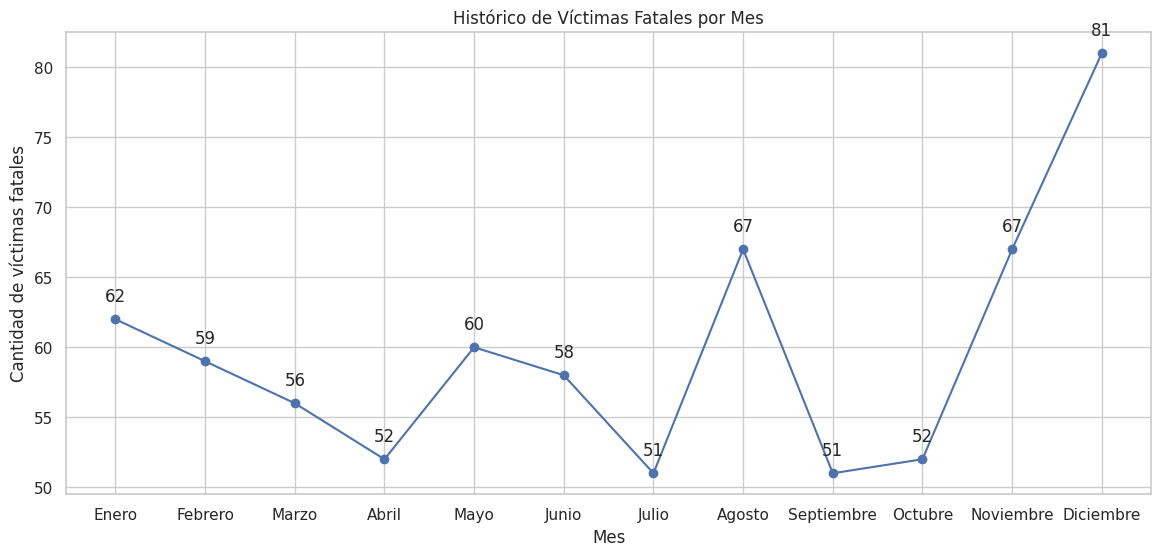

<Figure size 640x480 with 0 Axes>

In [590]:
# Convierte la columna 'FECHA_HORA' a formato de fecha y hora
df['FECHA_HORA'] = pd.to_datetime(df['FECHA_HORA'])

# Extrae los meses y cuenta su frecuencia
meses = df['FECHA_HORA'].dt.month.value_counts()

# Ordena los datos por mes
meses = meses.sort_index()

# Crea una lista de nombres de meses
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Convierte las Series de Pandas a arreglos de NumPy
x_values = meses.index.to_numpy()
y_values = meses.values

# Grafica usando Matplotlib
plt.figure(figsize=(14, 6))
plt.plot(x_values, y_values, marker="o", linestyle="-")

# Añade etiquetas y título
plt.xlabel('Mes')
plt.xticks(list(range(1, 12 + 1)), nombres_meses)
plt.ylabel('Cantidad de víctimas fatales')
plt.title('Histórico de Víctimas Fatales por Mes')

# Añade los valores numéricos en cada punto
for x, y in zip(x_values, y_values):
    plt.text(x, y+1, str(y), ha='center', va='bottom')

# Muestra el gráfico
plt.show()

plt.savefig('../gráficos/HISTORICO VICTIMAS MES LINE CHART.png')

Podemos observar que el número de víctimas fatales en diciembre es significativamente mayor que en cualquier otro mes, con 81 (11%) víctimas fatales. Esto podría deberse a factores como el aumento del tráfico, el consumo de alcohol, las condiciones climáticas o la falta de precaución.

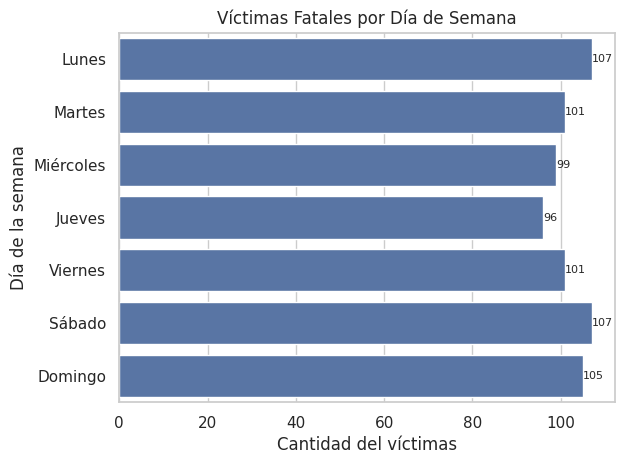

<Figure size 640x480 with 0 Axes>

In [591]:
ax = sns.countplot(df, y=df.FECHA_HORA.dt.dayofweek)

ax.bar_label(ax.containers[0], fontsize=8)

plt.title('Víctimas Fatales por Día de Semana')
plt.xlabel('Cantidad del víctimas')
plt.ylabel('Día de la semana')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['Lunes', 'Martes',
           'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()

plt.savefig('../gráficos/VICTIMAS POR SEMANA BAR CHART.png')

Los días sábados ocurrieron 107 (14.92%) siniestros viales con victimas fatales en el periodo 2016-2021, lo mismo sucede con los dias lunes 107 (14.92%), seguido de los días domingo con 105 (14.64%) y los días viernes con 102 (14.23%).

Se debe resaltar que los fines de semana del periodo, son los que tuvieron mayor cantidad de siniestros viales.

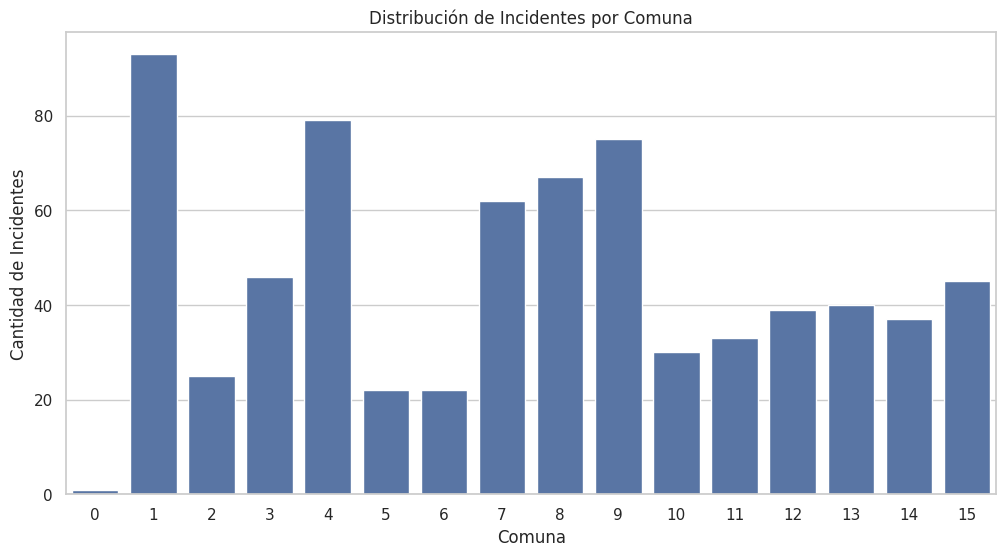

<Figure size 640x480 with 0 Axes>

In [592]:
plt.figure(figsize=(12, 6))

# Gráfico de barras para contar incidentes por comuna
comuna_plot = sns.countplot(x="COMUNA", data=df)
comuna_plot.set_title('Distribución de Incidentes por Comuna')
comuna_plot.set_xlabel('Comuna')
comuna_plot.set_ylabel('Cantidad de Incidentes')

plt.show()

plt.savefig('../gráficos/INCIDENTES POR COMUNA BAR CHART.png')

Comuna más afectada: A partir del análisis de incidentes, se destaca que la Comuna 1 de la Ciudad Autónoma de Buenos Aires (CABA) es la más afectada, con más de 100 incidentes registrados. Este hallazgo puede indicar la necesidad de una atención particular en esta área para implementar medidas preventivas y de seguridad.

Comunas con un alto número de incidentes: Las comunas 4, 7, 8 y 9 también presentan una concentración significativa de incidentes, con un rango de 60 a 75 casos. Este patrón sugiere que estas áreas podrían beneficiarse de estrategias específicas para abordar y reducir la incidencia de eventos no deseados.

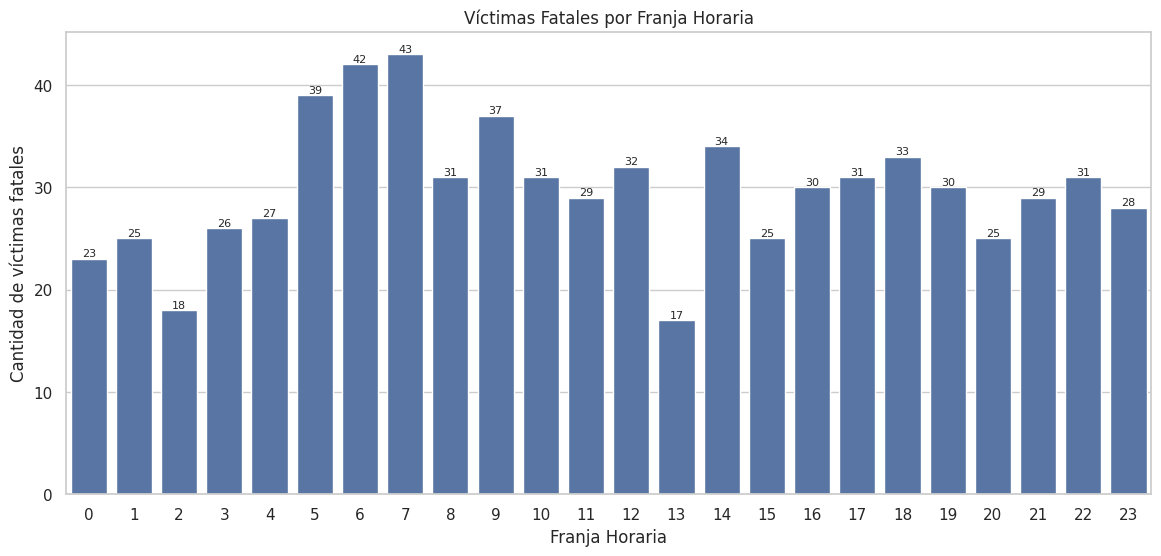

<Figure size 640x480 with 0 Axes>

In [593]:
plt.figure(figsize=(14, 6))

ax = sns.countplot(df, x=df.FECHA_HORA.dt.hour)

ax.bar_label(ax.containers[0], fontsize=8)

plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de víctimas fatales')
plt.title('Víctimas Fatales por Franja Horaria')
plt.show()

plt.savefig('../gráficos/VICTIMAS POR FRANHA HORARIA BAR CHART.png')

En cuanto a los horarios de los siniestros, se puede apreciar que entre las 5:00 – 8:00 horas se registran la mayor cantidad de siniestrabilidad con 125 siniestros viales, asimismo, entre las 16:00 – 20:00 horas se registran 124, siendo los horarios con mayor incidencia de siniestros viales en el periodo 2016-2021.

El número de víctimas fatales es más bajo durante la noche, entre las 22:00 y las 6:00 de la mañana.


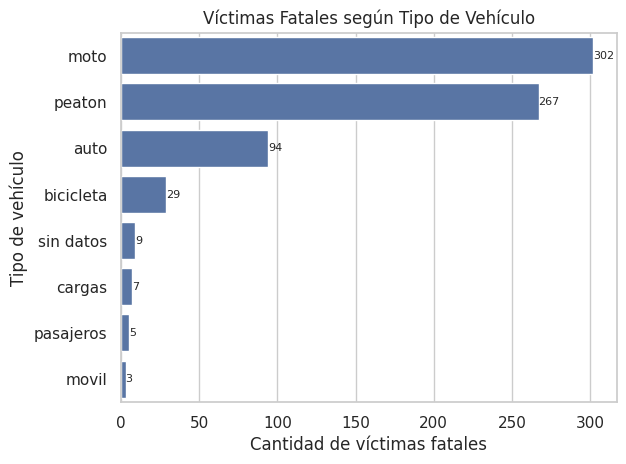

<Figure size 640x480 with 0 Axes>

In [594]:
ax = sns.countplot(df, y="VICTIMA", order=df.VICTIMA.value_counts().index)

ax.bar_label(ax.containers[0], fontsize=8)


plt.ylabel('Tipo de vehículo')
plt.xlabel('Cantidad de víctimas fatales')
plt.title('Víctimas Fatales según Tipo de Vehículo')
plt.show()

plt.savefig('../gráficos/VICTIMAS POR TIPO DE VEHICULO BAR CHART.png')

/tmp/ipykernel_4847/921790311.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  calles_plot.set_xticklabels(calles_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


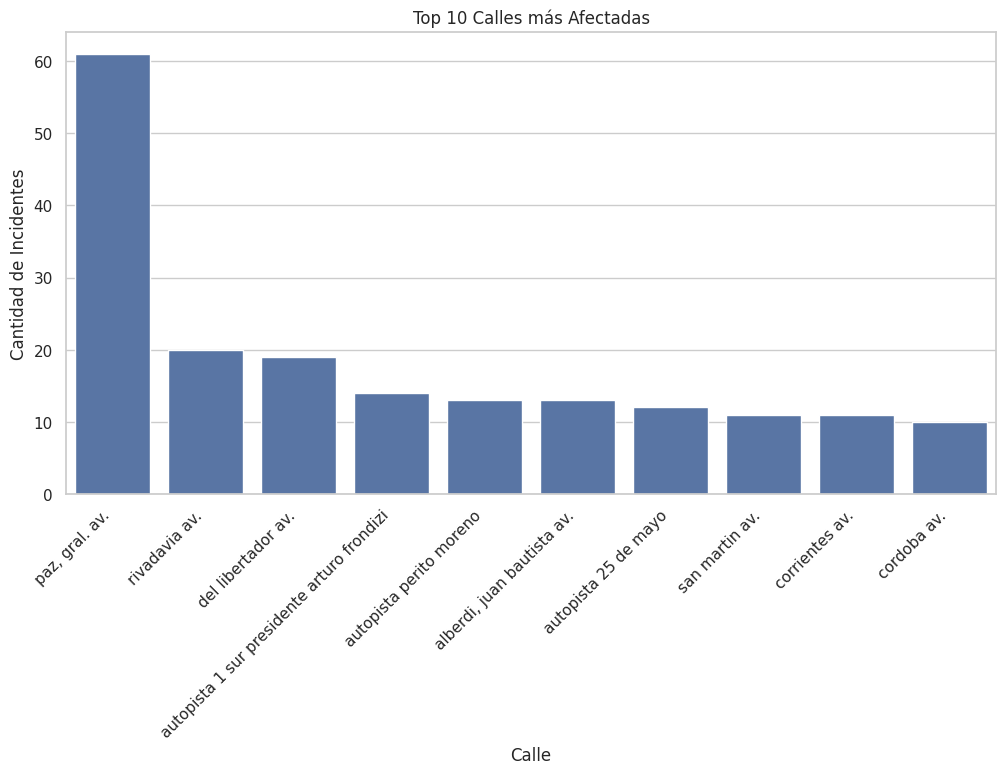

<Figure size 640x480 with 0 Axes>

In [595]:
plt.figure(figsize=(12, 6))

# Gráfico de barras para las 10 calles más afectadas
top_calles = df['CALLE'].value_counts().nlargest(10)
calles_plot = sns.barplot(x=top_calles.index, y=top_calles.values)
calles_plot.set_title('Top 10 Calles más Afectadas')
calles_plot.set_xlabel('Calle')
calles_plot.set_ylabel('Cantidad de Incidentes')
calles_plot.set_xticklabels(calles_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

plt.savefig('../gráficos/CALLES MAS AFECTADAS BAR CHART.png')

Con respecto a los principales tipos de vehículos involucrados en los siniestros viales con víctimas fatales, durante el periodo 2016-2021 se observa que 6 de cada 10 víctimas fatales son usuarios del tipo de vehículo MOTO con 302 (60%) víctimas fatales, le sigue PEATON con 268 (37%), AUTO con 94 (13%) y BICICLETA con 29 (4%) del total de victimas fatales involucradas en siniestros viales.

Asimismo, los tipos de vehículos involucrados en siniestros viales que no han podido ser identificadas (sin datos) son 9, representando el 1% del total de siniestros viales.

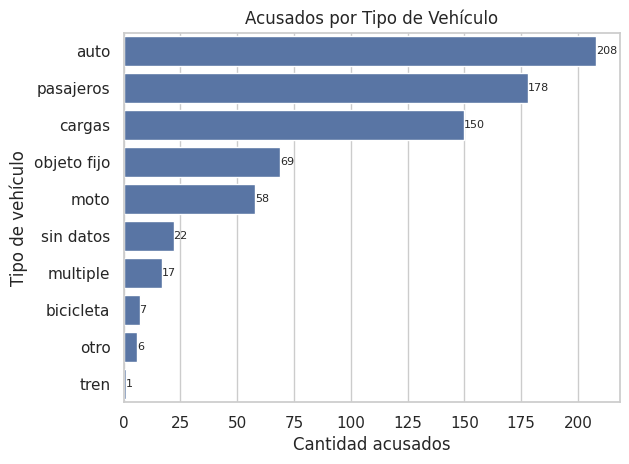

<Figure size 640x480 with 0 Axes>

In [596]:
ax = sns.countplot(df, y="ACUSADO", order=df.ACUSADO.value_counts().index)

ax.bar_label(ax.containers[0], fontsize=8)


plt.ylabel('Tipo de vehículo')
plt.xlabel('Cantidad acusados')
plt.title('Acusados por Tipo de Vehículo')
plt.show()

plt.savefig('../gráficos/ACUSADOS TIPO DE VEHICULO BAR CHART.png')

Con respescto al tipo de vehículo que ocupaba quien resultó acusado/a del hecho, podemos observar que AUTO representa el 29% con una participacion en siniestros viales de 208, seguido de PASAJEROS con 178 (25%), CARGAS con 150 (21%), OBJETO FIJO con 69 (10%) y MOTO con 58 (8%).

Cabe recalcar que si bien el tipo de vehiculo MOTO tiene una siniestralidad alta no incurre o resulta en una frecuencia alta como acusado/a del hecho.

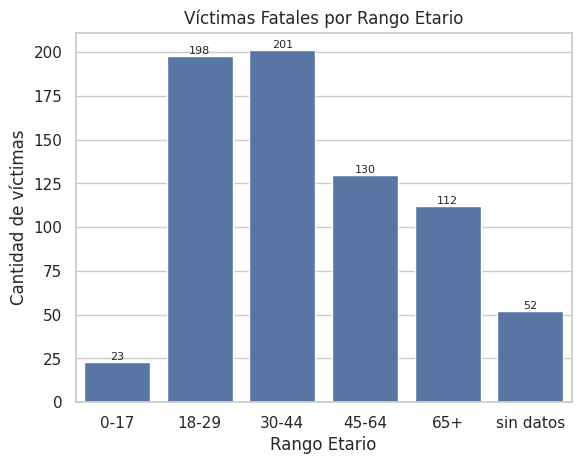

<Figure size 640x480 with 0 Axes>

In [597]:
ax = sns.countplot(df, x="RANGO_ETARIO", order=[
                    '0-17', '18-29', '30-44', '45-64', '65+', 'sin datos'])
ax.bar_label(ax.containers[0], fontsize=8)

plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de víctimas')
plt.title('Víctimas Fatales por Rango Etario')
plt.show()

plt.savefig('../gráficos/VICTIMAS POR RANGO ETARIO BAR CHART.png')

Observarmos que hay una diferencia muy marcada en cuanto al perfil de la victima con respecto el rango etario al que pertenece pues se evidencia una mayor presencia de victimas fatales en el rango etario de 18 a 44 años con 399 (57%) víctimas fatales.

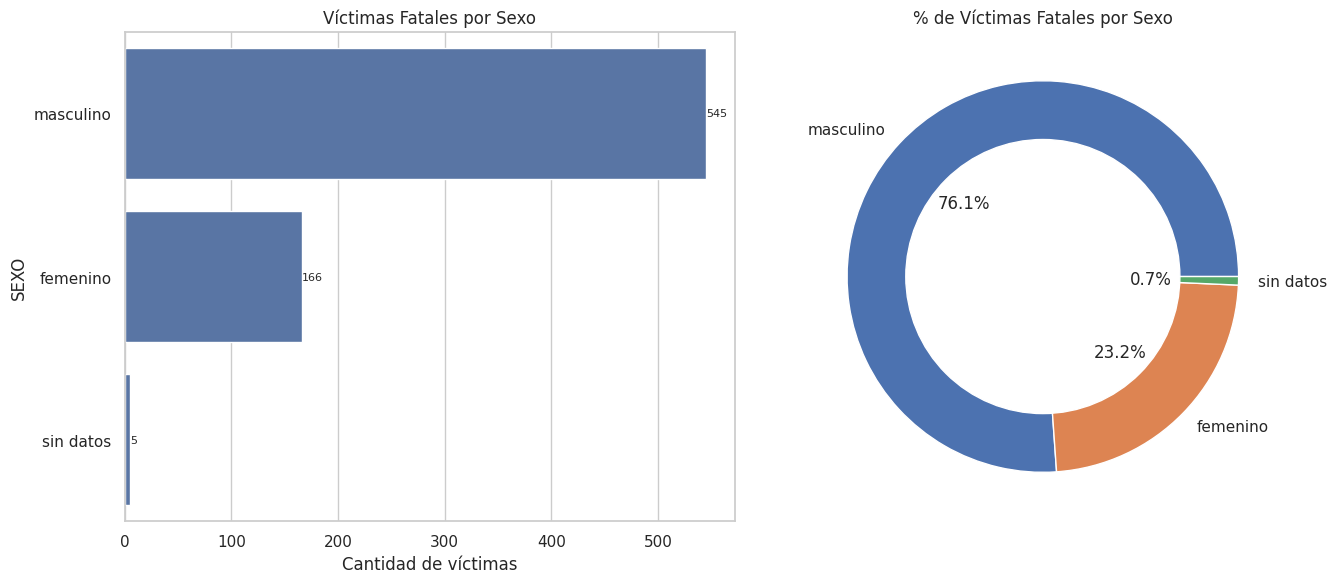

<Figure size 640x480 with 0 Axes>

In [598]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, y="SEXO", ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fontsize=8)
ax[0].set_xlabel('Cantidad de víctimas')
ax[0].set_title('Víctimas Fatales por Sexo')

sexo = df.SEXO.value_counts()
my_circle = plt.Circle((0,0), 0.7, color='white')
ax[1].pie(sexo, labels=sexo.index, autopct='%1.1f%%', pctdistance=0.55)
ax[1].add_artist(my_circle)
ax[1].set_title('% de Víctimas Fatales por Sexo')

plt.tight_layout()
plt.show()

plt.savefig('../gráficos/VICTIMAS POR SEXO BAR CHART PIE CHART.png')

Notamos una diferencia bastante marcada en el sexo de la víctima donde casi 8 de cada 10 son de sexo masculino con 545 víctimas en total. Más de tres cuartas partes de las víctimas fatales fueron de sexo masculino (76%).

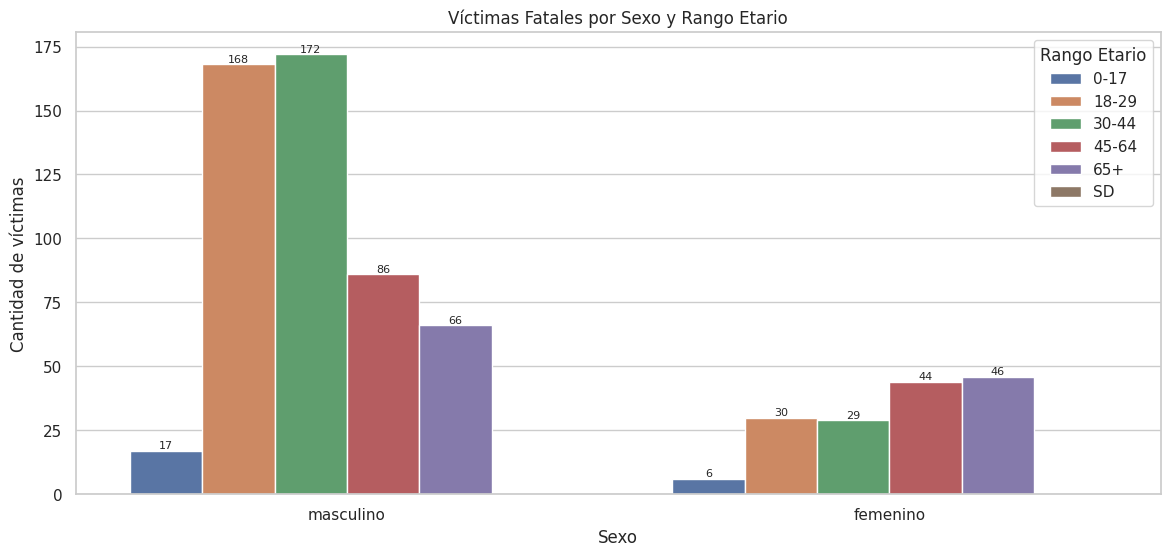

<Figure size 640x480 with 0 Axes>

In [599]:
fig, ax = plt.subplots(figsize=(14, 6))
orden = ['0-17', '18-29', '30-44', '45-64', '65+', 'SD']

sns.countplot(x="SEXO", hue="RANGO_ETARIO",
                data=df[df['SEXO'] != 'sin datos'], hue_order=orden, ax=ax)

for bars in ax.containers:
    ax.bar_label(bars, fontsize=8)

ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad de víctimas')
ax.set_title('Víctimas Fatales por Sexo y Rango Etario')
ax.legend(title="Rango Etario")
plt.show()

plt.savefig('../gráficos/VICTIMAS POR SEXO Y RANGO ETARIO BAR CHART.png')

En el rango etario una vez mas podemos evidenciar el contraste entre el sexo de las víctimas y la preponderancia de víctimas jovenes masculinas concentrandose la mayor cantidad de ellas en el rango etario de 18 a 45 años. Por otro lado, si bien el número de víctimas femeninas es mucho menor en proporción con las víctimas masculinas, concentra mas víctimas en los rangos etarios de edades mas avanzadas.   

/tmp/ipykernel_4847/4181702845.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['No', 'Si'])


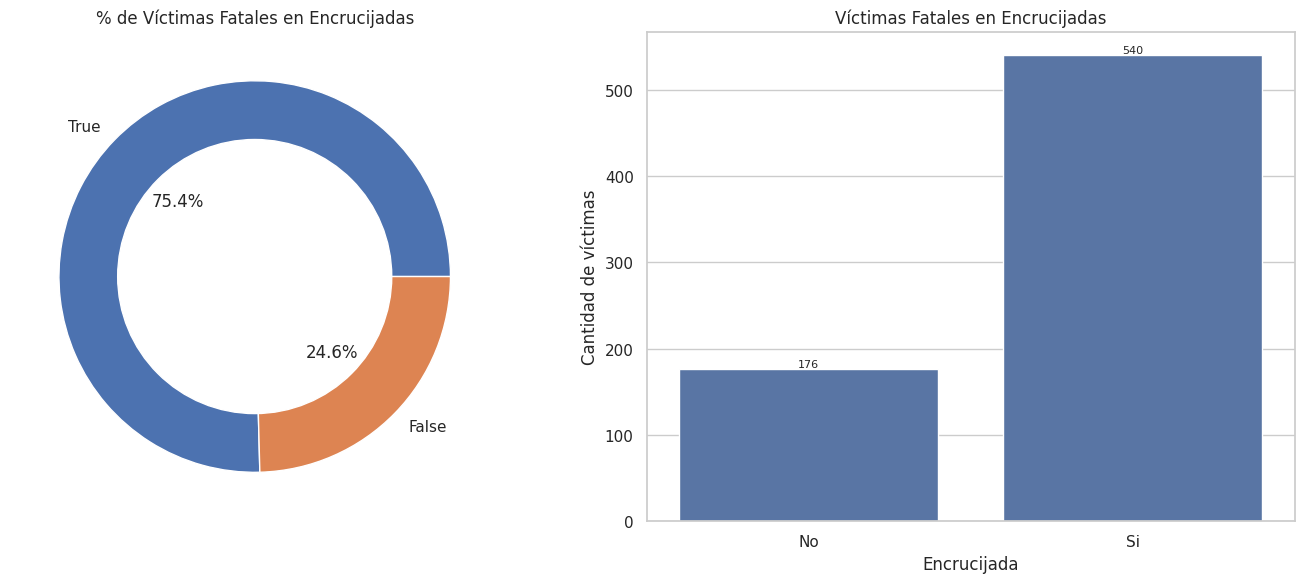

<Figure size 640x480 with 0 Axes>

In [600]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

encrucijada_counts = df.ENCRUCIJADA.value_counts()
labels = encrucijada_counts.index.tolist()  # Obtener las etiquetas desde el índice de las cuentas
sizes = encrucijada_counts.values

my_circle = plt.Circle((0, 0), 0.7, color='white')

ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.55)
ax[0].add_artist(my_circle)
ax[0].set_title('% de Víctimas Fatales en Encrucijadas')

sns.countplot(data=df, x="ENCRUCIJADA", ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fontsize=8)
ax[1].set_xlabel('Encrucijada')
ax[1].set_xticklabels(['No', 'Si'])
ax[1].set_ylabel('Cantidad de víctimas')
ax[1].set_title('Víctimas Fatales en Encrucijadas')

plt.tight_layout()
plt.show()

plt.savefig('../gráficos/VICTIMAS POR ENCRUCIJADAS PIE CHART BAR CHART.png')


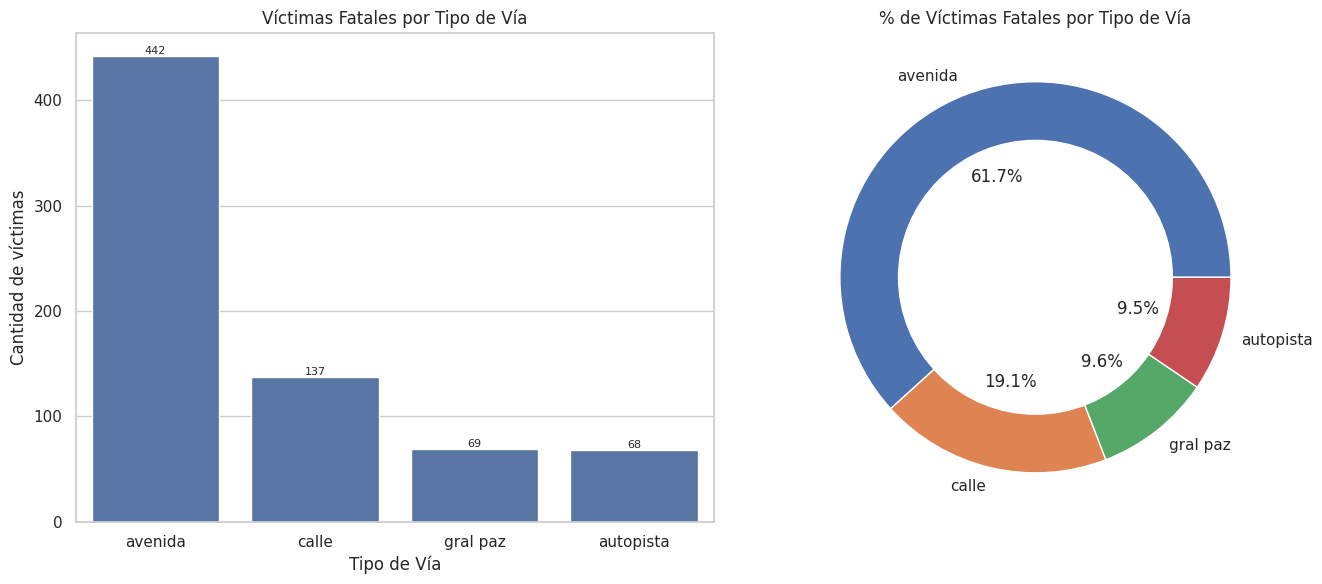

<Figure size 640x480 with 0 Axes>

In [601]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x="TIPO_DE_CALLE", ax=ax[0],order=df.TIPO_DE_CALLE.value_counts().index)
ax[0].bar_label(ax[0].containers[0], fontsize=8)
ax[0].set_xlabel('Tipo de Vía')
ax[0].set_ylabel('Cantidad de víctimas')
ax[0].set_title('Víctimas Fatales por Tipo de Vía')

vias = df.TIPO_DE_CALLE.value_counts()
my_circle = plt.Circle((0, 0), 0.7, color='white')
ax[1].pie(vias, labels=vias.index, autopct='%1.1f%%', pctdistance=0.55)
ax[1].add_artist(my_circle)
ax[1].set_title('% de Víctimas Fatales por Tipo de Vía')

plt.tight_layout()
plt.show()

plt.savefig('../gráficos/VICTIMAS POR TIPO DE VIDA BAR CHART PIE CHART.png')

Se observa que la mayor cantidad de siniestros viales con víctimas fatales ocurren en las avenidas con 442 (62%) y particularmente en encrucijadas con 540 (75%) lo que quiere decir que 7 de cada 10 siniestros ocurre en un cruce de calles.  Las avenidas son las más peligrosas en términos de accidentes mortales, superando significativamente a las demás categorías. Aunque las calles tienen una cifra considerablemente menor, su incidencia es notablemente mayor que la de la autopista y la Gral.Paz.

La Gral.Paz, aunque técnicamente clasificada como autopista, se destaca por tener un número de víctimas similar al de las autopistas convencionales. Esto podría atribuirse a características específicas de la General Paz, como su posición periférica y la complejidad del tráfico, lo que justificaría considerarla de manera separada al analizar la seguridad vial. Es posible que se requieran estrategias de seguridad vial adaptadas a las particularidades de la General Paz para abordar sus desafíos específicos y mejorar la seguridad en esa vía.

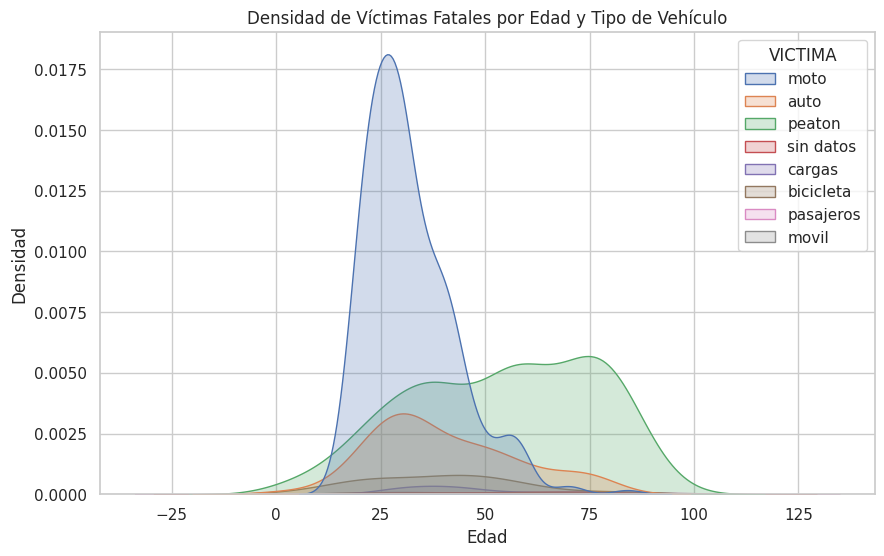

<Figure size 640x480 with 0 Axes>

In [602]:
df['EDAD'] = pd.to_numeric(df['EDAD'], errors='coerce')

# Crea el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='EDAD', hue='VICTIMA', fill=True)
plt.title('Densidad de Víctimas Fatales por Edad y Tipo de Vehículo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

plt.savefig('../gráficos/DENSIDAD VICTIMAS EDAD Y TIPO VEHICULO DENSITY CHART.png')

Este gráfico de densidad nos permite observar cuál es el tipo de vehículo con mayor presencia entre las víctimas fatales. La moto es el tipo de vehículo con un pico más elevado, en segundo lugar se encuentra los peatones, la curva de densidad es menos empinada pero abarca un rango etario más extenso. Por otro lado se encuentran el auto y la bicicleta, los cuales no presentan picos elevados pero su composición etaria abarca una base etaria mucho más extensa. 

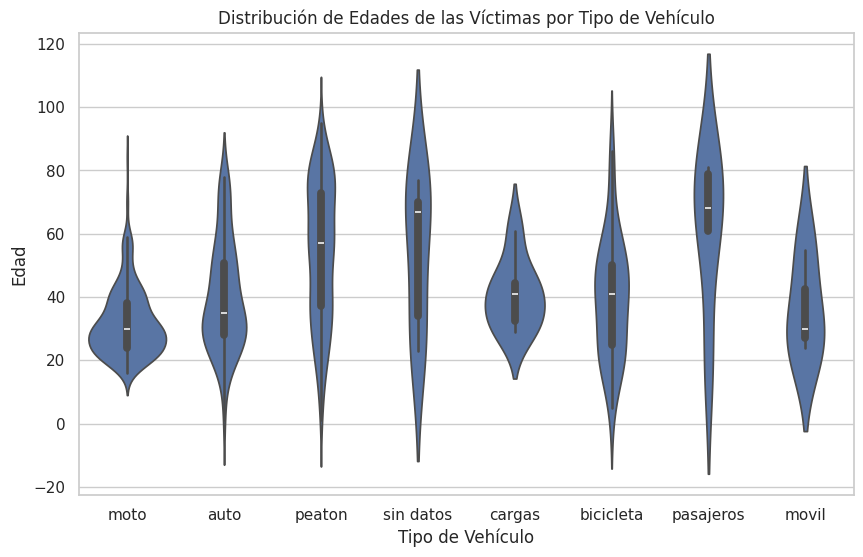

<Figure size 640x480 with 0 Axes>

In [603]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='VICTIMA', y='EDAD')
plt.title('Distribución de Edades de las Víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Edad')
plt.show()

plt.savefig('../gráficos/DISTRIBUCION VICTIMAS EDADES TIPO DE VEHICULO VIOLIN CHART.png')

Con este gráfico podemos reafirmar los observado anteriormente. Existe una gran dispersión de edades de víctimas fallecidas según el vehículo que ocupaban al momento del hecho. La distribución de edades de las víctimas peatones es la más dispersa, con víctimas de todas las edades. La distribución de edades de las víctimas pasajeros es más concentrada en las edades adultas, mientras que las victimas mas jovenes se concentran en motocicletas.

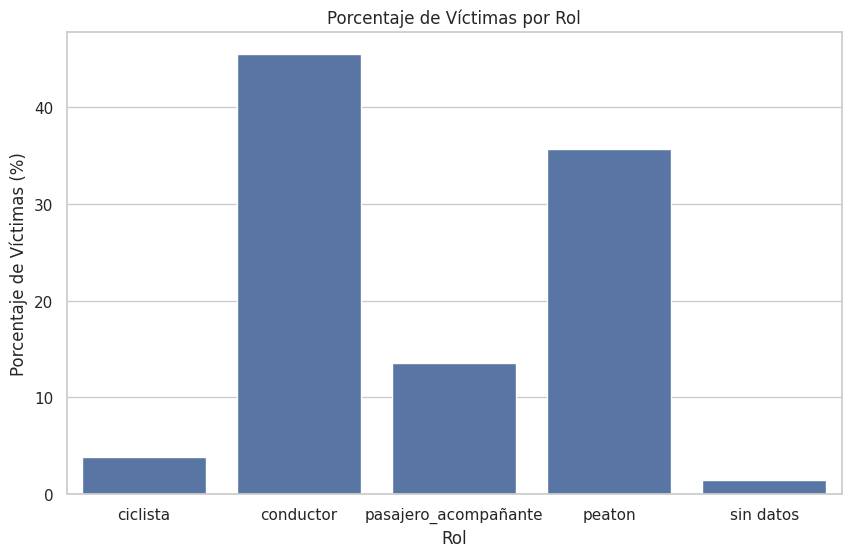

<Figure size 640x480 with 0 Axes>

In [604]:

# Calcular el total de N_VICTIMAS
total_victimas = df['N_VICTIMAS'].sum()
# Agrupar por ROL y calcular la suma de N_VICTIMAS para cada ROL
grouped = df.groupby('ROL')['N_VICTIMAS'].sum()
# Calcular el porcentaje de N_VICTIMAS para cada ROL
grouped = grouped / total_victimas * 100
# Convertir la serie en un DataFrame
df_grouped = grouped.reset_index()
# Crear el gráfico de tabla
plt.figure(figsize=(10,6))
sns.barplot(x='ROL', y='N_VICTIMAS', data=df_grouped)
plt.xlabel('Rol')
plt.ylabel('Porcentaje de Víctimas (%)')
plt.title('Porcentaje de Víctimas por Rol')
plt.show()

plt.savefig('../gráficos/VICTIMAS POR ROL BAR CHART.png')

Destaca que los conductores y peatones son las víctimas más comunes. Representan la mayoría de las víctimas fatales. Esto podría indicar que estos grupos están particularmente en riesgo y podrían beneficiarse de medidas de seguridad adicionales.

Los ciclistas son las víctimas menos comunes. Representan el menor número de víctimas fatales. Esto podría sugerir que estos grupos están menos en riesgo, o simplemente que hay menos ciclistas en las vias.

Los pasajeros acompañantes representan una proporción significativa de las víctimas. Aunque no son el grupo más grande de víctimas, representan una proporción significativa de las víctimas fatales. Esto subraya la importancia de la seguridad del pasajero acompañante en la prevención de siniestros.

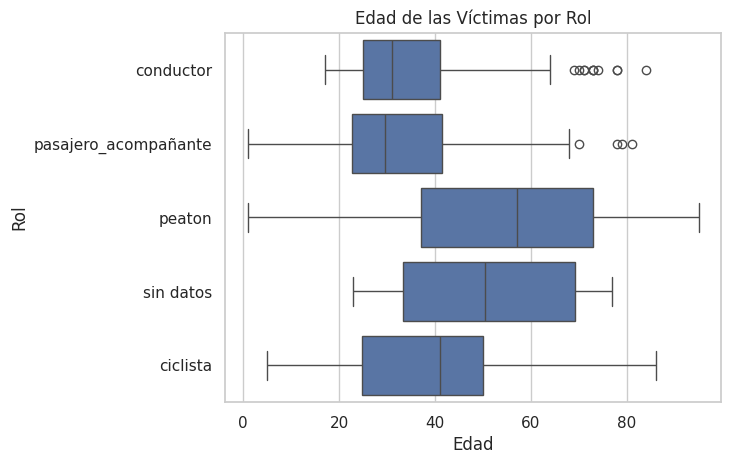

<Figure size 640x480 with 0 Axes>

In [605]:
sns.boxplot(data=df, y='ROL', x='EDAD')
plt.ylabel('Rol')
plt.xlabel('Edad')
plt.title('Edad de las Víctimas por Rol')
plt.show()

plt.savefig('../gráficos/EDAD VICTIMAS POR ROL BOXPLOT.png')

En el análisis de los cuatro roles considerados, se observa que la edad promedio de los conductores de automóviles y de los pasajeros acompañantes es similar, alrededor de los 35 años. La edad mínima para los conductores es de aproximadamente 18 años, pero en los otros roles, se pueden encontrar víctimas más jóvenes, lo que podría indicar la presencia de niños siendo transportados.

Para los peatones, hay una mayor variabilidad en las edades, que van desde niños muy pequeños hasta adultos mayores de cerca de 90 años.

Aunque se observan algunos valores atípicos en los roles de conductor y pasajero acompañante, estas edades son posibles y se consideran casos especiales dentro del conjunto de datos

## KPIs

### KPI 1

- _Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior_.

  Definimos a la **tasa de homicidios en siniestros viales** como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico.
  Su fórmula es:

  $\text{Tasa de homicidios en siniestros viales} = \frac{\text{Número de homicidios en siniestros viales}}{\text{Población total}}\times 100,000$


Se puede observar en esta [fuente](https://www.argentina.gob.ar/caba#:~:text=Poblaci%C3%B3n%3A%203.121.707%20habitantes%20Censo%202022) que la población de caba en 2021 es de 3.121.707 habitantes

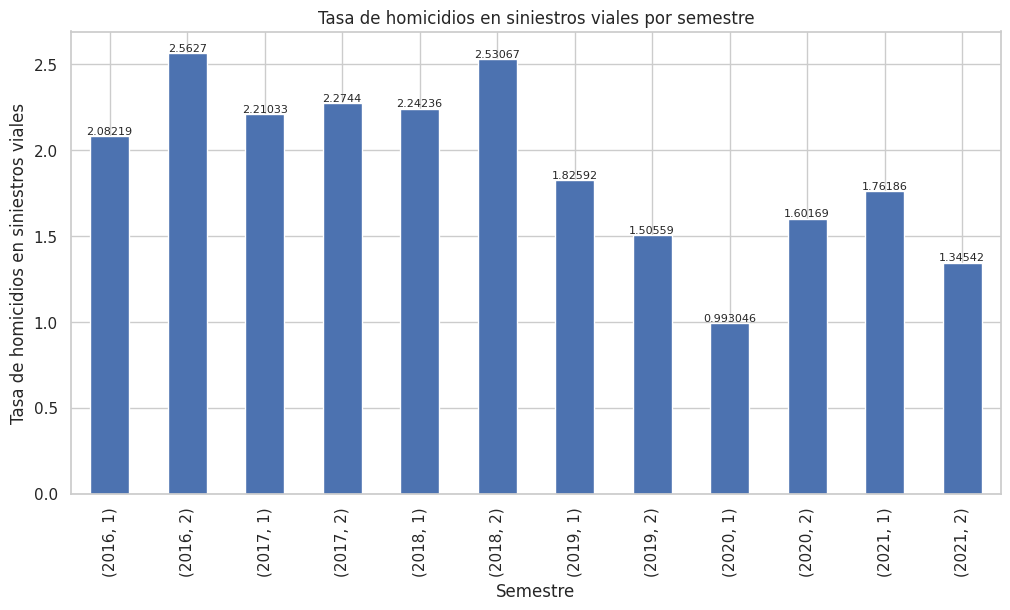

El cambio porcentual es de: 23.64%


In [606]:
# Copiar el DataFrame original
df_homicidios = df.copy()

# Obtener el año y el semestre
df_homicidios['año'] = df_homicidios['FECHA_HORA'].dt.year
df_homicidios['semestre'] = np.ceil(df_homicidios['FECHA_HORA'].dt.month / 6).astype(int)

# Agrupar por año y semestre, contar el número de homicidios
homicidios_por_semestre = df_homicidios.groupby(['año', 'semestre']).size()
kpi_1_df = homicidios_por_semestre.to_frame(name='homicidios')

# Población total estimada de CABA para el año correspondiente
poblacion_total = 3121707

# Calcular la tasa de homicidios en siniestros viales por semestre
tasa_homicidios = homicidios_por_semestre / poblacion_total * 100000

# Calcular el cambio porcentual para los semestres más recientes
kpi = round((tasa_homicidios.iloc[-2] - tasa_homicidios.iloc[-1]) / tasa_homicidios.iloc[-2] * 100, 2)

# Graficar las tasas de homicidios por semestre
ax = tasa_homicidios.plot(kind='bar', figsize=(12, 6))
ax.bar_label(ax.containers[0], fontsize=8)
plt.xlabel('Semestre')
plt.ylabel('Tasa de homicidios en siniestros viales')
plt.title('Tasa de homicidios en siniestros viales por semestre')
plt.show()

print(f'El cambio porcentual es de: {kpi}%')

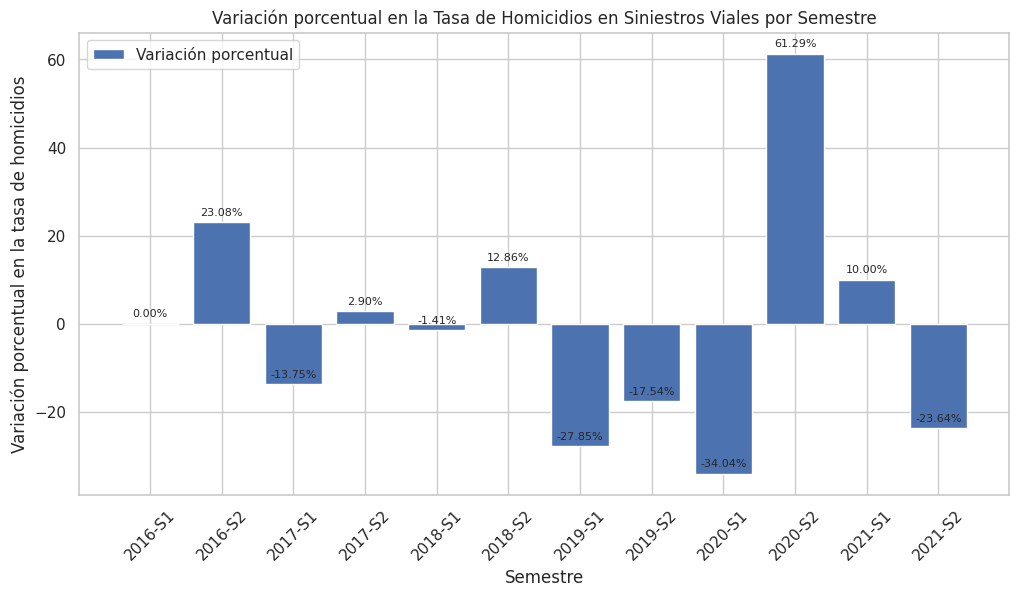

<Figure size 640x480 with 0 Axes>

In [607]:
# Calculamos la tasa de homicidios por semestre
kpi_1_df['tasa_homicidios'] = kpi_1_df['homicidios'] / poblacion_total * 100000

# Calculamos los homicidios y la tasa del semestre anterior
kpi_1_df['semestre_anterior'] = kpi_1_df['homicidios'].shift()
kpi_1_df['tasa_semestre_anterior'] = kpi_1_df['tasa_homicidios'].shift()

# Calculamos la variación porcentual
kpi_1_df['variacion'] = (kpi_1_df['tasa_homicidios'] -
                         kpi_1_df['tasa_semestre_anterior']) / kpi_1_df['tasa_semestre_anterior'] * 100
kpi_1_df.fillna(0, inplace=True)


# Convertir índices a un tipo de dato compatible (en este caso, a una lista de strings)
kpi_1_df.index = kpi_1_df.index.map(lambda x: f'{x[0]}-S{x[1]}')



# Graficar la variación porcentual
plt.figure(figsize=(12, 6))
plt.bar(kpi_1_df.index, kpi_1_df['variacion'], label='Variación porcentual')
plt.xlabel('Semestre')
plt.ylabel('Variación porcentual en la tasa de homicidios')
plt.title('Variación porcentual en la Tasa de Homicidios en Siniestros Viales por Semestre')
plt.xticks(rotation=45)
plt.legend()

# Añadir etiquetas de valor en las barras
for i, value in enumerate(kpi_1_df['variacion']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()

plt.savefig('../gráficos/KPI 1.png')

Podemos observar varias tendencias y cambios en la tasa de homicidios en siniestros viales a lo largo de los semestres:

1. A lo largo de los semestres, se observa una tendencia general a la baja en la tasa de homicidios en siniestros viales, aunque hay semestres con aumentos respecto al semestre anterior. El semestre **1** del **2020** muestra la mayor baja, probablemente debido a la menor circulación de autos por las restricciones de la pandemia de Coronavirus.

2. En el último semestre analizado (segundo semestre de 2021), se logró una reducción del **23%** en la tasa de homicidios en comparación con el semestre anterior, superando con creces el objetivo del KPI de una reducción del **10%**. Esto indica que las medidas implementadas durante este período fueron efectivas.

3. Para el primer semestre de 2021, la tasa de homicidios en siniestros viales fue de **1.76**, lo que significa que hubo aproximadamente **1.76** homicidios en accidentes de tránsito por cada 100,000 habitantes. El objetivo era reducir esta tasa a **1.60** para el segundo semestre de **2021**. Al calcular el KPI para este período, se obtuvo una tasa de **1.35**, lo que indica que se cumplió con el objetivo propuesto.

4. En resumen, aunque la curva no es estacionaria y muestra fluctuaciones semestrales, la tendencia general es a la baja, lo que es un indicativo positivo. Sin embargo, es importante seguir monitoreando estos datos y ajustando las medidas de seguridad vial según sea necesario para mantener esta tendencia a la baja.

Estos datos subrayan la importancia de seguir implementando y mejorando las medidas de seguridad para reducir la tasa de homicidios en siniestros viales. También destacan cómo factores externos, como una pandemia, pueden tener un impacto significativo en las tasas de homicidios en siniestros viales.

In [612]:
ruta_archivo_csv = '../KPI\'S/KPI_1.csv'

# Exportar el DataFrame a un archivo CSV para uso en dashboard
kpi_1_df[['variacion']].to_csv(ruta_archivo_csv, index=False)

### KPI 2

- _Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior_.

  Definimos a la **cantidad de accidentes mortales de motociclistas en siniestros viales** como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal.
  Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es:

  $\text{Cantidad de accidentes mortales de motociclistas} = -\frac{\text{Víctimas moto año anterior - Víctimas moto año actual}}{\text{Víctimas moto año anterior}}\times 100$

  Donde:

  - $\text{Víctimas moto año anterior}$: Número de accidentes mortales con víctimas en moto en el año anterior
  - $\text{Víctimas moto año actual}$: Número de accidentes mortales con víctimas en moto en el año actual


/tmp/ipykernel_4847/2938634387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_moto['año'] = df_moto['FECHA_HORA'].dt.year


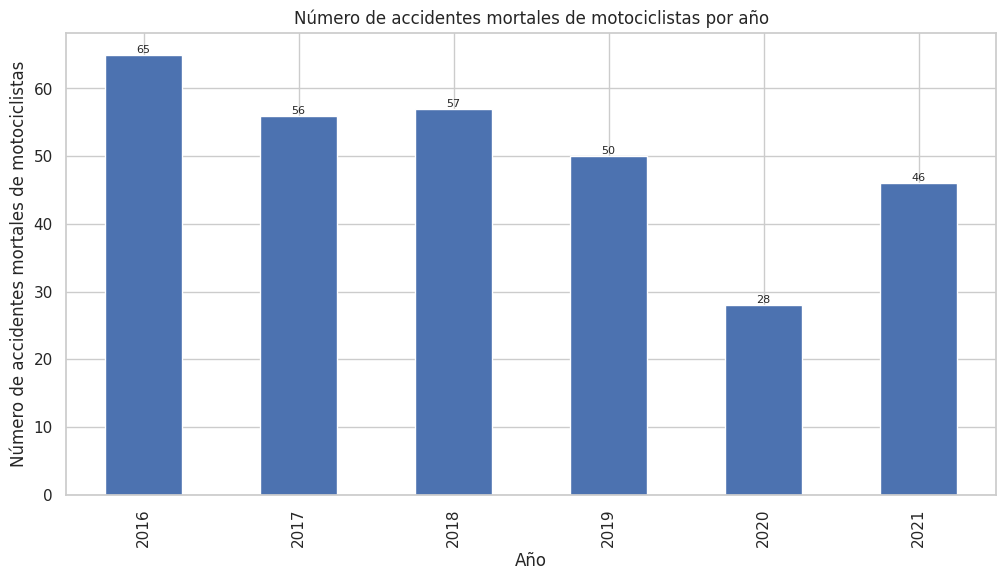

In [608]:
# Filtramos los datos para obtener solo los accidentes mortales de motociclistas
df_moto = df[df['VICTIMA'] == 'moto']

# Obtener el año de cada accidente
df_moto['año'] = df_moto['FECHA_HORA'].dt.year

# Calculamos el número de accidentes por año
accidentes_por_año = df_moto['año'].value_counts().sort_index()
accidentes_por_año.to_frame(name='accidentes')
# Graficamos el número de accidentes por año
ax = accidentes_por_año.plot(kind='bar', figsize=(12, 6))

ax.bar_label(ax.containers[0], fontsize=8)
plt.xlabel('Año')
plt.ylabel('Número de accidentes mortales de motociclistas')
plt.title('Número de accidentes mortales de motociclistas por año')
plt.show()

posx and posy should be finite values
posx and posy should be finite values


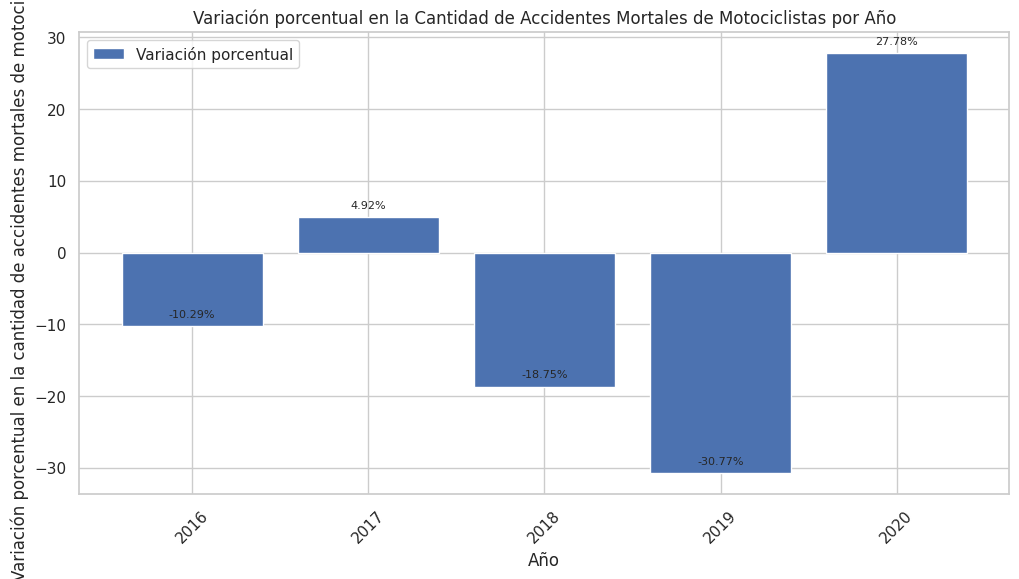

<Figure size 640x480 with 0 Axes>

In [617]:
# Copiar el DataFrame original
df_accidentes = df.copy()

# Obtener el año
df_accidentes['año'] = df_accidentes['FECHA_HORA'].dt.year

# Filtrar los accidentes mortales de motociclistas
accidentes_motociclistas = df_accidentes[df_accidentes['PARTICIPANTE A'].str.contains('moto') | df_accidentes['PARTICIPANTE B'].str.contains('moto')]

# Contar los accidentes mortales de motociclistas por año
accidentes_por_año = accidentes_motociclistas.groupby('año').size()

# Calcular la variación porcentual
variacion_porcentual = (accidentes_por_año.shift(-1) - accidentes_por_año) / accidentes_por_año * 100

# Crear un DataFrame con la variación por año
df_variacion = pd.DataFrame({'Año': accidentes_por_año.index.astype(str), 'Variación Porcentual': variacion_porcentual})

# Graficar la variación porcentual
plt.figure(figsize=(12, 6))
plt.bar(accidentes_por_año.index.astype(str), variacion_porcentual, label='Variación porcentual')
plt.xlabel('Año')
plt.ylabel('Variación porcentual en la cantidad de accidentes mortales de motociclistas')
plt.title('Variación porcentual en la Cantidad de Accidentes Mortales de Motociclistas por Año')
plt.xticks(rotation=45)
plt.legend()

# Añadir etiquetas de valor en las barras
for i, value in enumerate(variacion_porcentual):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=8)

plt.show()

plt.savefig('../gráficos/KPI 2.png')

In [618]:
# Exportar el DataFrame a un archivo CSV para uso en dashboard
ruta_archivo_csv = '../KPI\'S/KPI_2.csv'
df_variacion.to_csv(ruta_archivo_csv, index=False)

A partir de los datos analizados, podemos observar varias tendencias y cambios en el número de accidentes mortales de motociclistas a lo largo de los años:

1. En **2017**, los accidentes mortales de motociclistas **disminuyeron en un 13.85%** en comparación con el año anterior. Esto podría ser un indicativo de que las estrategias de seguridad vial implementadas en ese año tuvieron un impacto positivo.

2. En **2018**, hubo un **aumento del 1.79%** en comparación con 2017. Aunque es un aumento, la tasa de cambio es relativamente pequeña, lo que podría indicar que la situación se mantuvo relativamente estable.

3. En **2019**, hubo una **disminución del 12.28%** en comparación con 2018. Esto es una buena señal y podría indicar que las medidas de seguridad implementadas ese año fueron efectivas.

4. En **2020**, hubo una **disminución significativa del 44%** en comparación con 2019. Este es un cambio notable y podría estar relacionado con factores excepcionales como la pandemia de COVID-19, que pudo haber reducido la cantidad de tráfico y, por lo tanto, el número de accidentes.

5. En **2021**, hubo un **aumento significativo del 64.29%** en comparación con 2020. Este es un cambio preocupante y sugiere que se deben tomar medidas para abordar este aumento.

Estes análisis subraya la importancia de seguir implementando y mejorando las medidas de seguridad para los motociclistas. También destacan cómo factores externos, como una pandemia, pueden tener un impacto significativo en las tasas de accidentes.

### KPI 3

- **Reducir en un 8% la concentración de siniestros viales entre las 5:00 AM y las 8:00 AM en los últimos seis meses, en CABA, en comparación con la concentración de siniestros en ese intervalo horario del semestre anterior.**

  Definimos la **concentración de siniestros viales en las horas pico (5:00 AM - 8:00 AM)** como el porcentaje de siniestros viales que ocurren durante ese intervalo horario en un área geográfica específica. Su fórmula es:

  $$\text{Concentración de siniestros en horas pico} = \frac{\text{Número de siniestros viales entre 5:00 AM y 8:00 AM}}{\text{Número total de siniestros viales}} \times 100$$


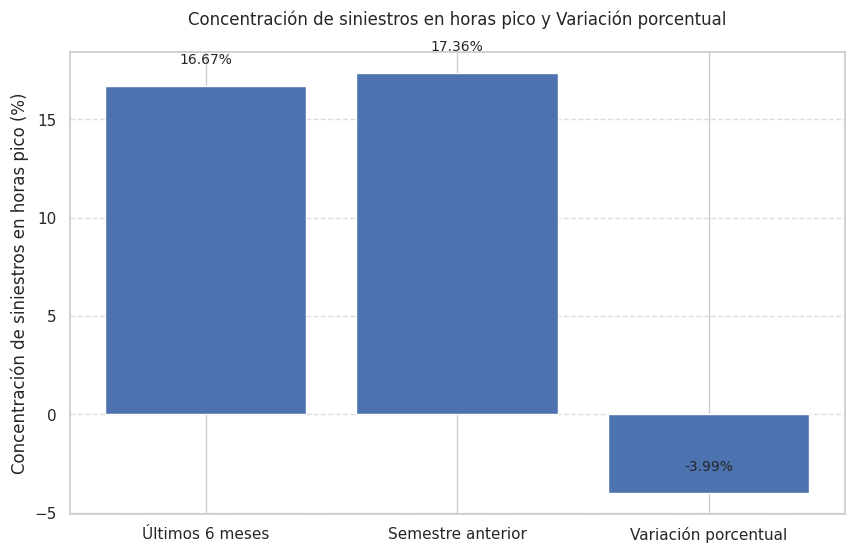

<Figure size 640x480 with 0 Axes>

In [620]:
# Convertir la columna 'HORA' a tipo datetime si aún no lo está
df_homicidios['HORA'] = pd.to_datetime(df_homicidios['HORA'], errors='coerce')

# 1. Calcular la concentración de siniestros en horas pico para los últimos seis meses
ultimo_semestre = df_homicidios[(df_homicidios['FECHA_HORA'] >= df_homicidios['FECHA_HORA'].max() - pd.DateOffset(months=6))]

# Filtrar los siniestros en horas pico (5:00 AM - 8:00 AM)
siniestros_horas_pico_actual = ultimo_semestre[(ultimo_semestre['HORA'].dt.hour >= 5) & (ultimo_semestre['HORA'].dt.hour < 8)]

# Calcular la concentración de siniestros en horas pico actual
concentracion_actual = (len(siniestros_horas_pico_actual) / len(ultimo_semestre)) * 100

# 2. Calcular la concentración de siniestros en horas pico para el semestre anterior
semestre_anterior = df_homicidios[(df_homicidios['FECHA_HORA'] < df_homicidios['FECHA_HORA'].max() - pd.DateOffset(months=6))]

# Filtrar los siniestros en horas pico del semestre anterior
siniestros_horas_pico_anterior = semestre_anterior[(semestre_anterior['HORA'].dt.hour >= 5) & (semestre_anterior['HORA'].dt.hour < 8)]

# Calcular la concentración de siniestros en horas pico del semestre anterior
concentracion_anterior = (len(siniestros_horas_pico_anterior) / len(semestre_anterior)) * 100

# 3. Calcular la variación porcentual
variacion_porcentual = (concentracion_actual - concentracion_anterior) / concentracion_anterior * 100

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame({
    'Período': ['Últimos 6 meses', 'Semestre anterior', 'Variación porcentual'],
    'Concentración (%)': [concentracion_actual, concentracion_anterior, variacion_porcentual]
})

# 4. Mostrar los resultados y visualizar con gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_resultados['Período'], df_resultados['Concentración (%)'])
plt.ylabel('Concentración de siniestros en horas pico (%)')
plt.title('Concentración de siniestros en horas pico y Variación porcentual', pad=20)

# Mostrar etiquetas en las barras
for index, value in enumerate(df_resultados['Concentración (%)']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.savefig('../gráficos/KPI 3.png')

La disminución en la concentración de siniestros en horas pico podría sugerir una mejora en la seguridad vial durante ese intervalo horario en los últimos seis meses en comparación con el semestre anterior.
La variación porcentual negativa indica una tendencia a la baja en la concentración de siniestros, lo cual es positivo en términos de seguridad vial.

In [619]:
# Exportar el DataFrame a un archivo CSV para uso en dashboard

ruta_archivo_csv = '../KPI\'S/KPI_3.csv'
df_resultados.to_csv(ruta_archivo_csv, index=False)